## Learning Outcomes
- Exploratory data analysis & preparing the data for model building. 
- Machine Learning - Supervised Learning Classification
  - Logistic Regression
  - Naive bayes Classifier
  - KNN Classifier
  - Decision Tree Classifier
  - Random Forest Classifier
  - Ensemble methods
- Training and making predictions using different classification models.
- Model evaluation

## Objective: 
- The Classification goal is to predict “heart disease” in a person with regards to different factors given. 

## Context:
- Heart disease is one of the leading causes of death for people of most races in the US. At least 1 of 3 key risk factors for heart disease: high blood pressure, high cholesterol, and smoking. 
- Detecting and preventing the factors that have the greatest impact on heart disease is very important in healthcare. Machine learning methods may detect "patterns" from the data and can predict whether a patient is suffering from any heart disease or not..

## Dataset Information

#### Source: https://www.kaggle.com/datasets/kamilpytlak/personal-key-indicators-of-heart-disease?datasetId=1936563&sortBy=voteCount
Originally, the dataset come from the CDC and is a major part of the Behavioral Risk Factor Surveillance System (BRFSS), which conducts annual telephone surveys to gather data on the health status of U.S. residents. 

This dataset consists of eighteen columns
- HeartDisease: Respondents that have ever reported having coronary heart disease (CHD) or myocardial infarction (MI)
- BMI: Body Mass Index (BMI)
- Smoking: smoked at least 100 cigarettes in your entire life
- AlcoholDrinking: Heavy drinkers (adult men having more than 14 drinks per week and adult women having more than 7 drinks per week
- Stroke:Ever had a stroke?
- PhysicalHealth: physical health, which includes physical illness and injury
- MentalHealth: for how many days during the past 30 days was your mental health not good?
- DiffWalking: Do you have serious difficulty walking or climbing stairs?
- Sex: male or female?
- AgeCategory: Fourteen-level age category
- Race: Imputed race/ethnicity value
- Diabetic: diabetes?
- PhysicalActivity: Adults who reported doing physical activity or exercise during the past 30 days other than their regular job
- GenHealth: Would you say that in general your health is good, fine or excellent?
- SleepTime: On average, how many hours of sleep do you get in a 24-hour period?
- Asthma: you had asthma?
- KidneyDisease: Not including kidney stones, bladder infection or incontinence, were you ever told you had kidney disease?
- SkinCancer: Ever had skin cancer?

### 1. Importing Libraries

In [1]:
# To enable plotting graphs in Jupyter notebook
%matplotlib inline
# Numerical libraries
import numpy as np   

# to handle data in form of rows and columns 
import pandas as pd    

# importing ploting libraries
import matplotlib.pyplot as plt   

#importing seaborn for statistical plots
import seaborn as sns

# Import sklearn learning library
import sklearn

# splitting data into training and test set
from sklearn.model_selection import train_test_split

# To scale the dimensions we need scale function which is part of sckikit preprocessing libraries
from sklearn.preprocessing import StandardScaler, LabelEncoder

# To Build Logistic and Linear Regression models
from sklearn.linear_model import LinearRegression, LogisticRegression

# calculate accuracy measures and confusion matrix
from sklearn.metrics import  accuracy_score, confusion_matrix
import warnings
warnings.filterwarnings('ignore')
 
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import StackingClassifier
from sklearn.ensemble import AdaBoostClassifier, GradientBoostingClassifier
from sklearn.tree import DecisionTreeClassifier

### 2. Load the dataset and display a sample of five rows of the data frame.

In [2]:
heart_df = pd.read_csv("heart_2020_cleaned.csv")
heart_df.sample(5)

,HeartDisease,BMI,Smoking,AlcoholDrinking,Stroke,PhysicalHealth,MentalHealth,DiffWalking,Sex,AgeCategory,Race,Diabetic,PhysicalActivity,GenHealth,SleepTime,Asthma,KidneyDisease,SkinCancer
159008,No,23.73,No,No,No,0.0,0.0,No,Female,35-39,White,No,Yes,Very good,8.0,No,No,No
246555,No,27.37,No,No,No,0.0,0.0,No,Female,25-29,Hispanic,No,Yes,Very good,7.0,Yes,No,No
257058,No,20.67,No,No,No,0.0,0.0,No,Female,40-44,White,No,Yes,Very good,8.0,No,No,No
180104,No,24.37,No,No,No,21.0,0.0,No,Male,55-59,White,No,No,Good,7.0,Yes,No,Yes
196831,No,20.53,No,No,No,0.0,0.0,No,Female,75-79,White,No,Yes,Good,8.0,No,No,No


### 3. Check the shape of the data (number of rows and columns). Check the general information about the dataframe using the .info() method.

In [3]:
heart_df.shape

(319795, 18)

In [4]:
heart_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 319795 entries, 0 to 319794
Data columns (total 18 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   HeartDisease      319795 non-null  object 
 1   BMI               319795 non-null  float64
 2   Smoking           319795 non-null  object 
 3   AlcoholDrinking   319795 non-null  object 
 4   Stroke            319795 non-null  object 
 5   PhysicalHealth    319795 non-null  float64
 6   MentalHealth      319795 non-null  float64
 7   DiffWalking       319795 non-null  object 
 8   Sex               319795 non-null  object 
 9   AgeCategory       319795 non-null  object 
 10  Race              319795 non-null  object 
 11  Diabetic          319795 non-null  object 
 12  PhysicalActivity  319795 non-null  object 
 13  GenHealth         319795 non-null  object 
 14  SleepTime         319795 non-null  float64
 15  Asthma            319795 non-null  object 
 16  KidneyDisease     31

### 4. Check the statistical summary of the dataset and write your inferences.

In [5]:
heart_df.describe().T

,count,mean,std,min,25%,50%,75%,max
BMI,319795.0,28.325399,6.356100,12.02,24.03,27.34,31.42,94.85
PhysicalHealth,319795.0,3.371710,7.950850,0.00,0.00,0.00,2.00,30.00
MentalHealth,319795.0,3.898366,7.955235,0.00,0.00,0.00,3.00,30.00
SleepTime,319795.0,7.097075,1.436007,1.00,6.00,7.00,8.00,24.00


In [6]:
heart_df.describe(include='O').T

,count,unique,top,freq
HeartDisease,319795,2,No,292422
Smoking,319795,2,No,187887
AlcoholDrinking,319795,2,No,298018
Stroke,319795,2,No,307726
DiffWalking,319795,2,No,275385
Sex,319795,2,Female,167805
AgeCategory,319795,13,65-69,34151
Race,319795,6,White,245212
Diabetic,319795,4,No,269653
PhysicalActivity,319795,2,Yes,247957


### 5. Check the percentage of missing values in each column of the data frame. Drop the missing values if there are any.

In [7]:
heart_df.isnull().sum()/len(heart_df) * 100

HeartDisease        0.0
BMI                 0.0
Smoking             0.0
AlcoholDrinking     0.0
Stroke              0.0
PhysicalHealth      0.0
MentalHealth        0.0
DiffWalking         0.0
Sex                 0.0
AgeCategory         0.0
Race                0.0
Diabetic            0.0
PhysicalActivity    0.0
GenHealth           0.0
SleepTime           0.0
Asthma              0.0
KidneyDisease       0.0
SkinCancer          0.0
dtype: float64

### 6. Check if there are any duplicate rows. If any drop them and check the shape of the dataframe after dropping duplicates.

In [8]:
len(heart_df[heart_df.duplicated()])

18078

In [9]:
heart_df.drop_duplicates(inplace=True)

In [10]:
heart_df.shape

(301717, 18)

### 7. Check the distribution of the target variable (i.e. 'HeartDisease') and write your observations.

In [11]:
hd_count = heart_df['HeartDisease'].value_counts()
hd_count

No     274456
Yes     27261
Name: HeartDisease, dtype: int64

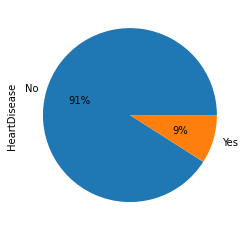

In [12]:
hd_count.plot(kind='pie', autopct='%1.0f%%')
plt.show()

### 8. Visualize the distribution of the target column 'Heart disease' with respect to various categorical features and write your observations.

In [13]:
categorical_features = heart_df.select_dtypes(include=[np.object])
categorical_features.columns

Index(['HeartDisease', 'Smoking', 'AlcoholDrinking', 'Stroke', 'DiffWalking',
       'Sex', 'AgeCategory', 'Race', 'Diabetic', 'PhysicalActivity',
       'GenHealth', 'Asthma', 'KidneyDisease', 'SkinCancer'],
      dtype='object')

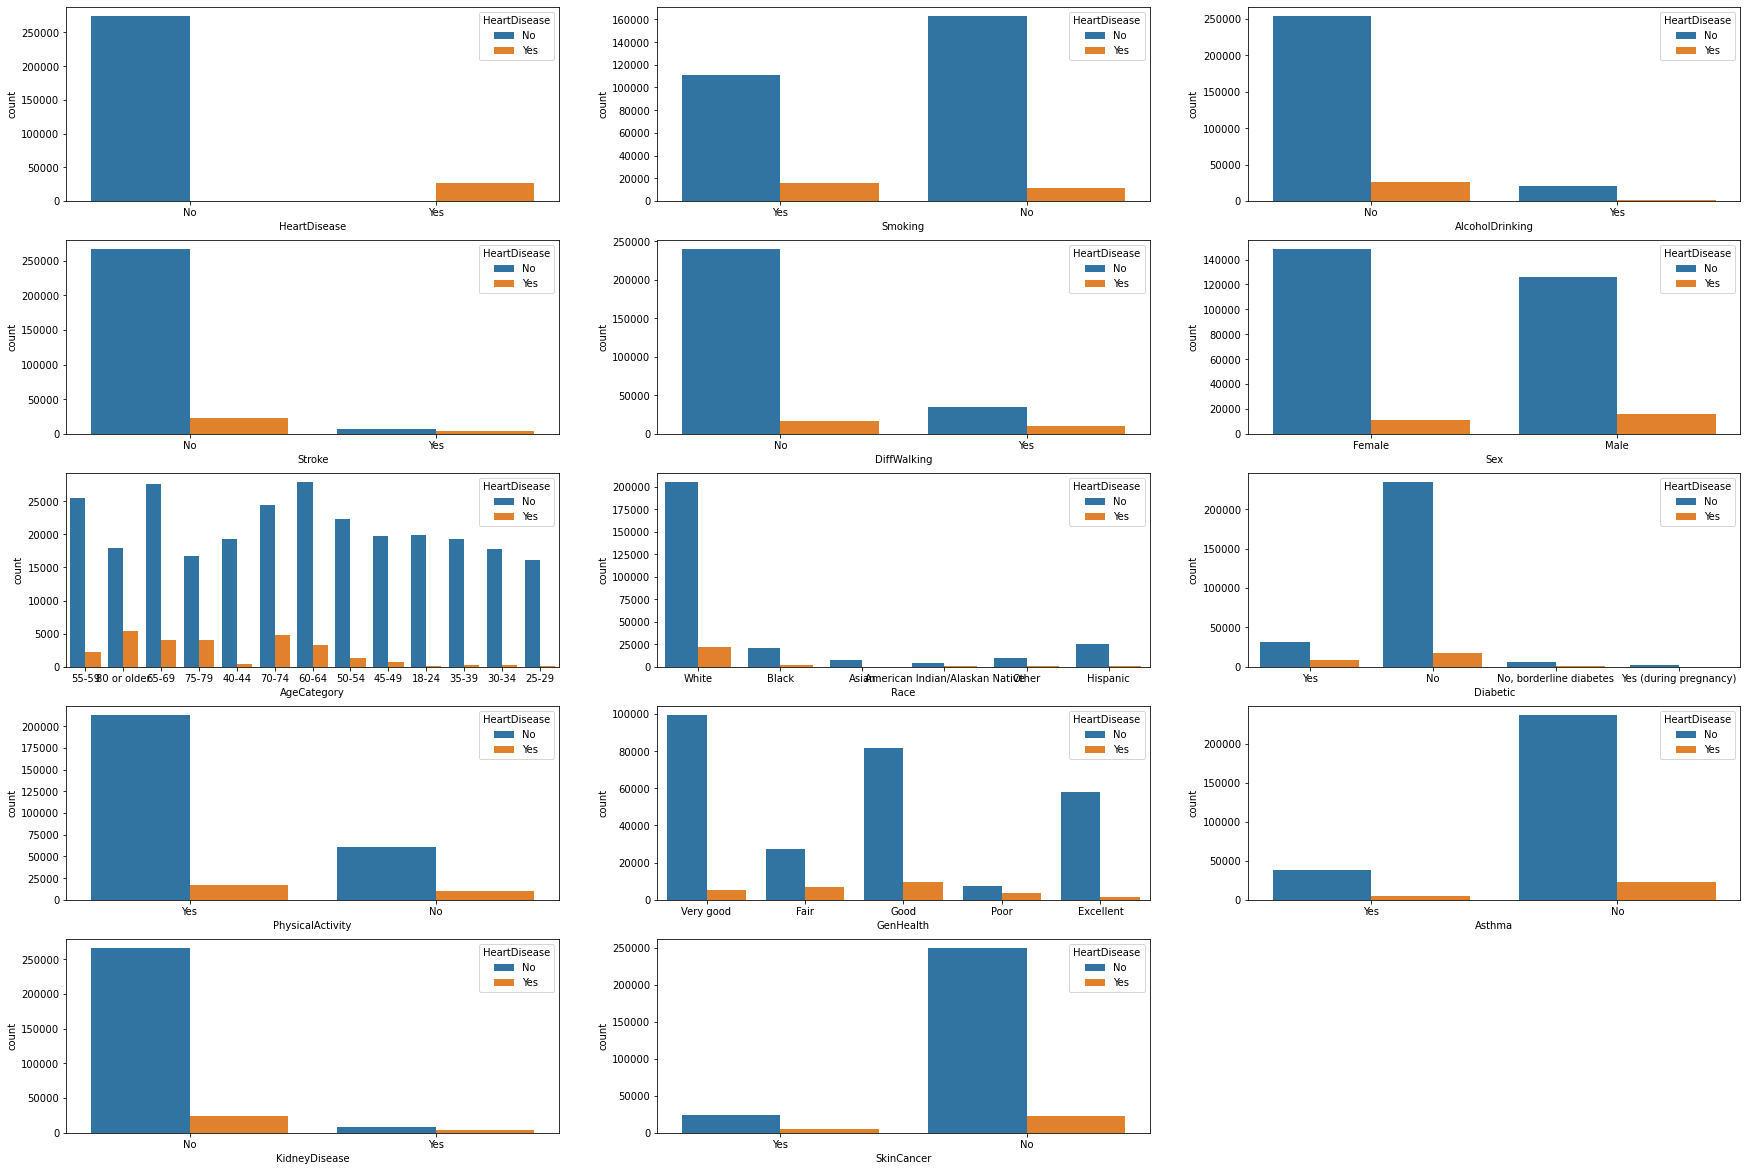

In [14]:
#i=1
plt.figure(figsize=(30,25))
for i, feature in enumerate (categorical_features):
    plt.subplot(6,3,i+1)
    sns.countplot(x=feature, hue='HeartDisease', data = heart_df)
    #i +=1

### 9. Check the unique categories in the column 'Diabetic'. Replace 'Yes (during pregnancy)' as 'Yes' and 'No, borderline diabetes' as 'No'.

In [15]:
heart_df['Diabetic'].unique()

array(['Yes', 'No', 'No, borderline diabetes', 'Yes (during pregnancy)'],
      dtype=object)

In [16]:
heart_df['Diabetic'] = heart_df['Diabetic'].replace({'Yes (during pregnancy)':'Yes','No, borderline diabetes':'No'})

heart_df['Diabetic'].unique()

array(['Yes', 'No'], dtype=object)

In [17]:
heart_df['Diabetic'].value_counts()

No     258572
Yes     43145
Name: Diabetic, dtype: int64

### 10. For the target column 'HeartDiease', Replace 'No' as 0 and 'Yes' as 1. 

In [18]:
heart_df['HeartDisease'].value_counts()

No     274456
Yes     27261
Name: HeartDisease, dtype: int64

In [19]:
heart_df['HeartDisease'] = heart_df['HeartDisease'].replace({'Yes':1,'No':0})

heart_df['HeartDisease'].value_counts()

0    274456
1     27261
Name: HeartDisease, dtype: int64

### 11. Label Encode the columns "AgeCategory", "Race", and "GenHealth". Encode the rest of the columns using dummy encoding approach.

In [20]:
# Label Encoding categorical columns "AgeCategory", "Race", and "GenHealth" using label encoder
# Select Object type variable
object_type_variables = [i for i in heart_df[[ 'AgeCategory','Race','GenHealth']] if heart_df.dtypes[i] == object]
object_type_variables

le = LabelEncoder()

def encoder(heart_df):
    for i in object_type_variables:
        q = le.fit_transform(heart_df[i].astype(str))
        heart_df[i]=q
        heart_df[i]=heart_df[i].astype(int)
encoder(heart_df)

In [21]:
# Dummy encoding the rest of the categorical columns, since they have binary entries 'Yes' or 'No'
heart_df = pd.get_dummies(heart_df,drop_first=True)

In [22]:
# Check a sample of 5 records after the encoding
heart_df.sample(5)

,HeartDisease,BMI,PhysicalHealth,MentalHealth,AgeCategory,Race,GenHealth,SleepTime,Smoking_Yes,AlcoholDrinking_Yes,Stroke_Yes,DiffWalking_Yes,Sex_Male,Diabetic_Yes,PhysicalActivity_Yes,Asthma_Yes,KidneyDisease_Yes,SkinCancer_Yes
157501,0,26.87,0.0,0.0,0,5,4,8.0,0,0,0,0,1,0,0,0,0,0
53624,0,23.71,0.0,0.0,4,5,0,6.0,0,0,0,0,0,0,1,0,0,0
120710,0,23.11,0.0,2.0,8,5,2,8.0,1,0,0,0,1,0,1,1,0,0
273602,0,31.51,0.0,2.0,4,3,2,5.0,0,0,0,0,0,0,0,0,0,0
90677,0,26.63,0.0,0.0,5,5,4,9.0,0,0,0,0,0,0,1,0,0,0


### 12. Store the target column (i.e.'HeartDisease') in the y variable and the rest of the columns in the X variable.

In [23]:
# Lets store target column in variable y and the rest of the columns in variable X
X = heart_df.drop('HeartDisease',axis=1)
y = heart_df['HeartDisease']

### 13. Split the dataset into two parts (i.e. 70% train and 30% test) and print the shape of the train and test data

In [24]:
# Splitting the dataset in train set and test set of 70 to 30 ratio using train_test_split()
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.30, random_state=1)

print(X_train.shape,X_test.shape)
print(y_train.shape,y_train.shape)

(211201, 17) (90516, 17)
(211201,) (211201,)


### 14. Standardize the numerical columns using Standard Scalar approach for both train and test data.

In [25]:
ss = StandardScaler()

X_train.iloc[:,:7]=ss.fit_transform(X_train.iloc[:,:7])
X_test.iloc[:,:7]=ss.transform(X_test.iloc[:,:7])

In [26]:
# Lets check the scalled data
X_train.head(5)

,BMI,PhysicalHealth,MentalHealth,AgeCategory,Race,GenHealth,SleepTime,Smoking_Yes,AlcoholDrinking_Yes,Stroke_Yes,DiffWalking_Yes,Sex_Male,Diabetic_Yes,PhysicalActivity_Yes,Asthma_Yes,KidneyDisease_Yes,SkinCancer_Yes
188627,-0.516354,-0.439337,-0.507179,1.251880,0.512361,-1.469684,-0.057969,0,0,0,0,1,0,1,0,0,1
301971,2.203127,-0.439337,0.724062,0.694199,0.512361,-0.146465,0.623187,0,0,0,1,0,0,1,0,0,0
203082,0.842614,-0.439337,-0.507179,-0.700004,-1.920700,-1.469684,-0.739125,0,0,0,0,0,0,0,1,0,0
156541,-0.861120,1.279882,-0.260931,0.973039,0.512361,-0.808075,0.623187,1,0,0,0,1,1,0,1,0,0
88990,-0.401947,-0.193735,-0.260931,-0.421163,0.512361,-0.146465,0.623187,1,0,0,0,0,0,1,0,0,0


In [27]:
X_test.head(5)

,BMI,PhysicalHealth,MentalHealth,AgeCategory,Race,GenHealth,SleepTime,Smoking_Yes,AlcoholDrinking_Yes,Stroke_Yes,DiffWalking_Yes,Sex_Male,Diabetic_Yes,PhysicalActivity_Yes,Asthma_Yes,KidneyDisease_Yes,SkinCancer_Yes
249747,0.081963,-0.439337,-0.507179,-0.142323,-1.920700,-0.146465,-0.739125,0,0,0,0,0,0,1,1,0,0
196201,2.503059,-0.193735,1.955304,0.136518,0.512361,-0.146465,0.623187,0,0,0,0,0,0,1,0,0,0
228204,-0.836384,0.788676,-0.507179,0.973039,0.512361,-0.808075,2.666656,1,0,0,1,1,1,0,0,1,1
65497,-0.085009,-0.439337,-0.507179,-1.257685,0.512361,1.176754,-0.057969,0,0,0,0,0,0,1,0,0,0
153926,0.511762,-0.439337,-0.507179,-0.421163,-1.920700,-0.808075,0.623187,0,0,0,0,0,0,0,0,0,0


### 15. Write a function.
- i) Which can take the model and data as inputs.
- ii) Fits the model with the train data.
- iii) Makes predictions on the test set.
- iv) Returns the Accuracy Score.

In [28]:
# function with model and data as infut parameters
def fit_n_predict(model, X_train, X_test, y_train, y_test): 
    # Fit the model with train data
    model.fit(X_train, y_train)
    
    # Making prediction on test set
    pred=model.predict(X_test)
    
    # Calculating the accuracy score
    accuracy = accuracy_score(y_test, pred)
    
    return accuracy 

In [29]:
# Testing the above function
lr = LogisticRegression()

Lable = 'Logistic Regression'

rs = pd.DataFrame(columns = ['Accuracy'])

rs.loc[Lable] = fit_n_predict(lr,X_train, X_test, y_train, y_test)

rs

,Accuracy
Logistic Regression,0.909861


### 16. Use the function and train a Logistic regression, KNN, Naive Bayes, Decision tree, Random Forest, Adaboost, GradientBoost, and Stacked Classifier models and make predictions on test data and evaluate the models, compare and write your conclusions and steps to be taken in future in order to improve the accuracy of the model.

In [30]:
# Initializing the Models

nb = GaussianNB()
knn = KNeighborsClassifier()
dt = DecisionTreeClassifier()
rf = RandomForestClassifier()
adb = AdaBoostClassifier()
gb = GradientBoostingClassifier()

estimators = [('rf',rf),('knn',knn),('gb',gb),('adb',adb)]
sc = StackingClassifier(estimators = estimators, final_estimator=rf)


In [33]:
result = pd.DataFrame(columns = ['Accuracy'])

for model, model_name in zip([lr,nb,knn,dt,rf,adb,gb,sc],
                            ['Logistic Regression','Naive Bayes','KNN','Descision Tree',
                            'Random Forest','Ada Boost','Gradient Boost','Stacking']):  
    result.loc[model_name] = fit_n_predict(model,X_train, X_test, y_train, y_test)

In [34]:
result

,Accuracy
Logistic Regression,0.909861
Naive Bayes,0.840017
KNN,0.900780
Descision Tree,0.853529
Random Forest,0.898504
Ada Boost,0.910833
Gradient Boost,0.911209
Stacking,0.905961


### Conclusion

Conclusion based on EDA-
• People who smoke have higher chances of heart disease than no smokers
• Male are more prone to suffer from heart diseases as compared to females
• People with age limit in between 55-75 has higher chances of getting heart diseases
• If person has difficulty in walking or climbing stairs there is a high probability that he or she is suffering from some heart disease
• There are higher chances of a person having heart disease if he does not have any kidney disease.

 Model-
• We see that the best performing models are Gradient Boost, Adaboost,Logistic Regression and KNN with around 90-91% accuracy.
• Please note that the target class is highly imbalanced So, accuracy does not holds good for imbalanced data. Accuracy becomes poor measure of evaluation for our classification model in this context.
• We can further go with evaluating the models based on the different performance metrics such as presicion, recall and F1score and choose the model accordingly.

----
## Happy Learning:)
----